#Lab3
Pre-trained detection models such as Mask R-CNN detect and segment objects of fixed classes, including stop signs

It is proposed to train the selected model to segment 8 types of signs on the Russian road signs data set https://www.kaggle.com/datasets/viacheslavshalamov/russian-road-signs-segmentation-dataset containing 100,000 images of Russian road signs (the segmentation set is built on based on the detection data set https://graphics.cs.msu.ru/projects/traffic-sign-recognition.html ).

Pre-trained models can be used from the MMDetection library https://github.com/open-mmlab/mmdetection, or you can try YOLOv8
Testing should be carried out on 10 photographs of streets with road signs, taken independently near ITMO University, if it is impossible for good reasons, then in other recognizable places - these photographs with predicted segmentation will need to be shown to the inspector.

The quality of segmentation is assessed using the metrics IoU, Precision, Recall, L2 separately on the validation part of the Russian road signs image set and photographs taken, also interested in the percentage of images in which IoU >= 0.5, IoU >= 0.75, IoU >= 0.9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/mmdetection

[Errno 2] No such file or directory: '/content/mmdetection'
/content


#Installations

In [ ]:
!pip install jedi>=0.16
!pip3 install openmim
# !pip install torch==1.7.0+cu110 -f https://download.pytorch.org/whl/torch_stable.htm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"
!pip install -v -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 37679, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 37679 (delta 114), reused 157 (delta 72), pack-reused 37399
Receiving objects: 100% (37679/37679), 63.04 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (25953/25953), done.
/content/mmdetection
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 6.6 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 9.7 MB/s eta 0:00:00
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pi

#Importings

In [ ]:
import torch, torchvision
import json
import numpy as np
from tqdm import tqdm

# print("Torch versions:", torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
# print("MMDet version:", mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
# print("MMCV Cuda:", get_compiling_cuda_version())
# print("MMCV compiler:", get_compiler_version())

#Dataset and Loading data

##Loading

In [ ]:
# https://www.kaggle.com/discussions/general/74235
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d viacheslavshalamov/russian-road-signs-segmentation-dataset

100% 401M/401M [00:19<00:00, 23.6MB/s]
100% 401M/401M [00:19<00:00, 21.3MB/s]


In [ ]:
!unzip '/content/mmdetection/russian-road-signs-segmentation-dataset.zip'

Archive:  /content/mmdetection/russian-road-signs-segmentation-dataset.zip
  inflating: sign_dataset/train/1.jpg  
  inflating: sign_dataset/train/1.jpg_coco.json  
  inflating: sign_dataset/train/10.jpg  
  inflating: sign_dataset/train/10.jpg_coco.json  
  inflating: sign_dataset/train/100.jpg  
  inflating: sign_dataset/train/100.jpg_coco.json  
  inflating: sign_dataset/train/1000.jpg  
  inflating: sign_dataset/train/1000.jpg_coco.json  
  inflating: sign_dataset/train/1001.jpg  
  inflating: sign_dataset/train/1001.jpg_coco.json  
  inflating: sign_dataset/train/1002.jpg  
  inflating: sign_dataset/train/1002.jpg_coco.json  
  inflating: sign_dataset/train/1003.jpg  
  inflating: sign_dataset/train/1003.jpg_coco.json  
  inflating: sign_dataset/train/1004.jpg  
  inflating: sign_dataset/train/1004.jpg_coco.json  
  inflating: sign_dataset/train/1005.jpg  
  inflating: sign_dataset/train/1005.jpg_coco.json  
  inflating: sign_dataset/train/1006.jpg  
  inflating: sign_dataset/trai

##reading

In [ ]:
folder = '/content/mmdetection/sign_dataset/train'

with open(f'{folder}/via_region_data.json') as annot:
    all_a = json.load(annot)

In [ ]:
all_classes = {}
all_shapes = {}

for p_d in all_a.values():
    shape = f"{p_d['file_attributes']['width']}x{p_d['file_attributes']['height']}"
    if shape not in all_shapes:
        all_shapes[shape] = [p_d['filename']]
    else:
        all_shapes[shape].append(p_d['filename'])

    for reg_data in p_d['regions'].values():
        shape = reg_data['shape_attributes']
        name = shape['name']
        if name not in all_classes:
            all_classes[name] = shape

for shape, instances in all_shapes.items():
    all_shapes[shape] = (instances[0], len(instances))

for name, data in all_classes.items():
    print("Name: {name} Example: {data}".format(name=name, data=data))

print()
print(f"All shapes: {all_shapes}")

Name: polygon Example: {'name': 'polygon', 'all_points_x': [1226, 1247, 1268, 1226], 'all_points_y': [275, 232, 275, 275]}
Name: ellipse Example: {'name': 'ellipse', 'cx': 999.5, 'cy': 347, 'rx': 21.5, 'ry': 21.5}
Name: circle Example: {'name': 'circle', 'cx': 724, 'cy': 386, 'r': 10}
Name: rect Example: {'name': 'rect', 'x': 1207, 'y': 167, 'width': 71, 'height': 97}

All shapes: {'1280x720': ('2050.jpg', 1720), '1920x1080': ('1750.jpg', 290), '960x1280': ('202.jpg', 3), '3120x4160': ('165.jpg', 40), '4160x3120': ('42.jpg', 1)}


In [ ]:
def blend_two_colors(color1, color2, ratio):
    inverse_ratio = 1.0 - ratio
    r = int(color1[0] * ratio + color2[0] * inverse_ratio)
    g = int(color1[1] * ratio + color2[1] * inverse_ratio)
    b = int(color1[2] * ratio + color2[2] * inverse_ratio)
    return (r, g, b)

In [ ]:
def get_or_else(d, key, default):
    if key in d:
        return d[key]
    else:
        return default

Image number: 120 Annotation key: 120.jpg116565
General info:
{"fileref": "", "size": 116565, "filename": "120.jpg", "base64_img_data": "", "file_attributes": {"width": 1280, "height": 720}, "regions": {"0": {"shape_attributes": {"name": "polygon", "all_points_x": [1222, 1191, 1236, 1266, 1222], "all_points_y": [264, 306, 338, 294, 264]}, "region_attributes": {"name": "road sign"}}}}


Rois: 7it [00:00, 462.82it/s]
Bounding boxes: 7it [00:15,  2.25s/it]
Regions: 100%|██████████| 1/1 [00:00<00:00, 505.22it/s]


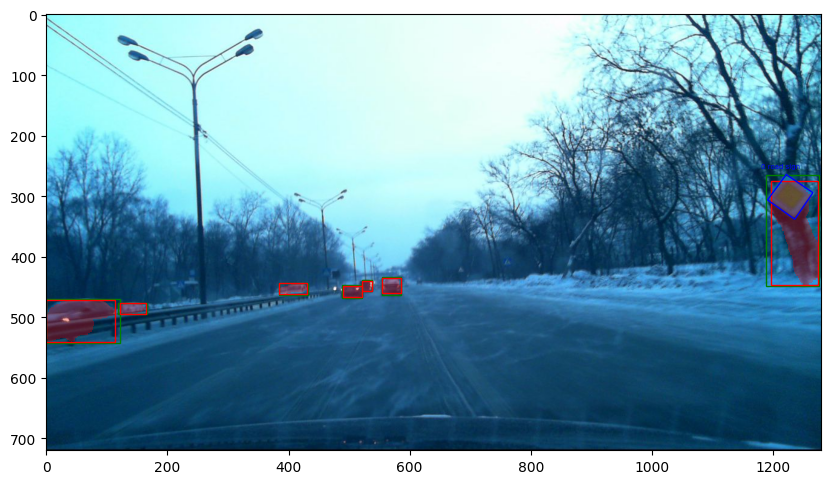

In [ ]:
img_number = 120

with open(f'{folder}/{img_number}.jpg_coco.json') as fst_photo:
    photo_annot = json.load(fst_photo)

annot_key = [key for key in all_a.keys() if key.startswith(f"{img_number}.jpg")][0]
print(f"Image number: {img_number} Annotation key: {annot_key}")
photo_info = all_a[annot_key]
print(f"General info:\n{json.dumps(photo_info)}")
# show image from a file with bounding box
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

filename = photo_info['filename']
img = Image.open(f'{folder}/{filename}')
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(img)

# Rois - (region of interest)
for (i, (y1, x1, y2, x2)) in tqdm(enumerate(photo_annot['rois']), desc = 'Rois'):
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

# Bounding boxes and masks
base_alpha = 0.3
for (i, (y1, x1, y2, x2)) in tqdm(enumerate(photo_annot['bbox']), desc = 'Bounding boxes'):
    box_w = x2 - x1
    box_h = y2 - y1
    rect = patches.Rectangle((x1, y1), box_w, box_h, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    w = box_w / 56
    h = box_h / 56
    for ix in range(56):
        for iy in range(56):
            cur_mask = photo_annot['masks'][iy][ix][i]
            if cur_mask:
                x = x1 + w * ix
                y = y1 + h * iy

                rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='none', facecolor='red', alpha=base_alpha)
                ax.add_patch(rect)

# Regions
# That's what we need to convert to coco format
# And use later to train our model
for (reg, reg_data) in tqdm(photo_info['regions'].items(), desc = 'Regions'):
    text_annot = str(reg) + " " + get_or_else(reg_data['region_attributes'], 'name', '')
    shape = reg_data['shape_attributes']

    if shape['name'] == "ellipse":
        cx, cy, rx, ry = (shape['cx'], shape['cy'], shape['rx'], shape['ry'])
        el = patches.Ellipse((cx, cy), rx * 2, ry * 2, linewidth=1, edgecolor='blue', facecolor='none')
        ax.text(cx - rx - 10, cy - ry - 10, text_annot, color='blue', fontsize=5)
        ax.add_patch(el)
    elif shape['name'] == "circle":
        cx, cy, r = (shape['cx'], shape['cy'], shape['r'])
        el = patches.Ellipse((cx, cy), r * 2, r * 2, linewidth=1, edgecolor='blue', facecolor='none')
        ax.text(cx - rx - 10, cy - ry - 10, text_annot, color='blue', fontsize=5)
        ax.add_patch(el)
    elif shape['name'] == "rect":
        x, y, w, h = (shape['x'], shape['y'], shape['width'], shape['height'])
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='none')
        ax.text(x - 10, y - 10, text_annot, color='blue', fontsize=5)
        ax.add_patch(rect)
    elif shape['name'] == "polygon":
        xs, ys = (shape['all_points_x'], shape['all_points_y'])
        pol = patches.Polygon(np.array([xs, ys]).transpose(), closed = True, linewidth=1, edgecolor='blue', facecolor='none')
        x_min = np.min(xs)
        y_min = np.min(ys)
        ax.text(x_min - 10, y_min - 10, text_annot, color='blue', fontsize=5)
        ax.add_patch(pol)
    else:
        raise AssertionError(f"Unknown shape: {shape}")

plt.show()

In [ ]:
def flatten_list(list):
    return [item for sublist in list for item in sublist]

def polygon_to_poly(xs, ys):
    poly = list(zip(xs, ys))
    if poly[0] == poly[-1]:
        poly = poly[:-1]
    return poly

def rectangle_to_poly(x, y, w, h):
    return [(x, y), (x + w, y), (x + w, y + h), (x, y + h)]

def circle_to_poly(cx, cy, r):
    return [(cx + r * np.cos(a), cy - r * np.sin(a)) for a in np.arange(0, 2 * np.pi, 0.1)]

def ellipse_to_poly(cx, cy, rx, ry):
    return [(cx + rx * np.cos(a), cy - ry * np.sin(a)) for a in np.arange(0, 2 * np.pi, 0.1)]

def polygon_area(xs, ys):
    return 0.5 * np.abs(np.dot(xs, np.roll(ys, 1)) - np.dot(ys, np.roll(xs, 1)))

def convert_annot_to_coco(folder, annot_file, out_file):
    data_infos = json.load(open(folder + annot_file, 'r'))

    annotations = []
    images = []
    obj_count = 0
    for idx, info in enumerate(tqdm(data_infos.values(), total=len(data_infos), desc=f'Converting {folder} to COCO')):
        filename = info['filename']
        height, width = (info['file_attributes']['height'], info['file_attributes']['width'])

        images.append(dict(
            id=idx,
            file_name=filename,
            height=height,
            width=width))

        for region in info['regions'].values():
            shape = region['shape_attributes']
            poly = None
            area = None
            if shape['name'] == "ellipse":
                cx, cy, rx, ry = (shape['cx'], shape['cy'], shape['rx'], shape['ry'])
                poly = ellipse_to_poly(cx, cy, rx, ry)
                area = np.pi * rx * ry
            elif shape['name'] == "circle":
                cx, cy, r = (shape['cx'], shape['cy'], shape['r'])
                poly = circle_to_poly(cx, cy, r)
                area = np.pi * r * r
            elif shape['name'] == "rect":
                x, y, w, h = (shape['x'], shape['y'], shape['width'], shape['height'])
                poly = rectangle_to_poly(x, y, w, h)
                area = w * h
            elif shape['name'] == "polygon":
                xs, ys = (shape['all_points_x'], shape['all_points_y'])
                poly = polygon_to_poly(xs, ys)
                area = polygon_area(xs, ys)
            else:
                raise AssertionError(f"Unknown shape: {shape}")

            poly = np.array(poly)
            x_min, y_min, x_max, y_max = (
                int(min(poly[:, 0])),
                int(min(poly[:, 1])),
                int(max(poly[:, 0])),
                int(max(poly[:, 1]))
                )

            annotations.append(dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=area,
                segmentation=[[int(x) for x in flatten_list(poly)]],
                iscrowd=0))
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id':0, 'name': 'road_sign', 'supercategory': 'sign'}])

    json.dump(coco_format_json, open(folder + out_file, 'w'), indent=None)

In [ ]:
val_folder = '/content/mmdetection/sign_dataset/val'

In [ ]:
convert_annot_to_coco(folder + '/', 'via_region_data.json', 'annotation_coco.json')
convert_annot_to_coco(val_folder + '/', 'via_region_data.json', 'annotation_coco.json')

Converting /content/mmdetection/sign_dataset/train/ to COCO: 100%|██████████| 2054/2054 [00:00<00:00, 3345.13it/s]
Converting /content/mmdetection/sign_dataset/val/ to COCO: 100%|██████████| 127/127 [00:00<00:00, 2779.58it/s]


In [ ]:
# all_categories = []
# for x in imgIds:
#   ann = coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
#   for y in list(ann):
#     if y['category_id'] not in all_categories:
#       all_categories.append(y['category_id'])
#   # print(len(list(ann)))
# len(all_categories), all_categories

#Loading mmdetection model

In [ ]:
!rm -r '/content/mmdetection/checkpoints'

rm: cannot remove '/content/mmdetection/checkpoints': No such file or directory


In [ ]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2023-12-09 10:17:04--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 192.169.122.217, 192.169.122.212, 192.169.122.213, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|192.169.122.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  22.6MB/s    in 7.8s    

2023-12-09 10:17:12 (21.7 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [ ]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth \
      -O checkpoints/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth

--2023-12-09 10:17:12--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 192.169.122.217, 192.169.122.212, 192.169.122.213, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|192.169.122.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177868694 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  1018KB/s    in 3m 11s  

2023-12-09 10:20:24 (910 KB/s) - ‘checkpoints/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth’ saved [177868694/177868694]



In [ ]:
from mmengine.runner import set_random_seed
# from mmcv import Config
from mmengine.config import Config
# cfg = Config.fromfile('/content/mmdetection/configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py')
cfg = Config.fromfile('./configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_1x_coco.py')

In [ ]:
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth exists in /content/mmdetection/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /content/mmdetection/checkpoints


In [ ]:
from mmengine.runner import set_random_seed
# from mmcv import Config
from mmengine.config import Config
# cfg = Config.fromfile('/content/mmdetection/configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_1x_coco.py')
# # cfg = Config.fromfile('/content/mmdetection/configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-1x_coco.py')
# # Modify dataset classes and color
# # print(cfg.train_dataloader.dataset.metainfo)
cfg.metainfo = {
    'classes': ('road_sign', ),
    'palette': [
        (220, 20, 60),
    ]
}

# Modify dataset type and path
cfg.data_root = '/content/mmdetection/sign_dataset'

cfg.train_dataloader.dataset.ann_file = 'train/annotation_coco.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'val/annotation_coco.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'val/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader = cfg.val_dataloader

# # Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'val/annotation_coco.json'
cfg.test_evaluator = cfg.val_evaluator
print(cfg.val_evaluator)
# Modify num classes of the model in box head and mask head
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# cfg.load_from = '/content/drive/MyDrive/image_generation - lab3- 1e-4-20ep/last_checkpoint'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.002 / 8
cfg.default_hooks.logger.interval = 100
cfg.train_cfg.max_epochs = 15


# Set seed thus the results are more reproducible
# cfg.seed = 0
# set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
# cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

#------------------------------------------------------
config=f'./configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_RussianSign.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

{'type': 'CocoMetric', 'ann_file': '/content/mmdetection/sign_dataset/val/annotation_coco.json', 'metric': ['bbox', 'segm'], 'format_only': False, 'backend_args': None}


In [ ]:
#the perfect match:
#checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
#'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

#Train

In [ ]:
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

In [ ]:
!python tools/train.py {config}

12/06 06:26:45 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 177626298
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_

In [ ]:
!cp -r '/content/mmdetection/tutorial_exps' '/content/drive/MyDrive/image_generation - lab3- 122/'

#Testing

In [ ]:
import random
import torch
import numpy as np

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
import mmcv
import os.path as osp
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
cfg = Config.fromfile('/content/drive/MyDrive/image_generation-lab3-5e-4-20ep-interval30/mask-rcnn_r50-caffe_fpn_ms-poly-3x_RussianSign.py')
# Set seed thus the results are more reproducible
# print(cfg.seed)
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.load_from = '/content/drive/MyDrive/image_generation-lab3-5e-4-20ep-interval30/last_checkpoint'

# # # Build dataset
# # datasets = [build_dataset(cfg.train_dataset)]
model = init_detector(cfg, device='cuda:0')  # or device='cuda:0'
# # Add an attribute for visualization convenience
# model

/content/mmdetection/mmdet/apis/inference.py:70: UserWarning: checkpoint is None, use COCO classes by default.
  warnings.warn('checkpoint is None, use COCO classes by default.')


In [ ]:
# !gdown 'https://thumbs.dreamstime.com/z/moscow-russia-july-road-sign-stop-other-signs-all-together-street-170845591.jpg'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mmengine.visualization import Visualizer
# get built visualizer

from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
# Visualizer.dataset_meta = model.dataset_meta
from mmengine.visualization import Visualizer
Visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
Visualizer_now.dataset_meta = model.dataset_meta


/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('/content/mmdetection/moscow-russia-july-road-sign-stop-other-signs-all-together-street-170845591.jpg',channel_order='rgb')
new_result2 = inference_detector(model, img)
# print(new_result)

In [ ]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Choose to use a config and initialize the detector
config_file = '/content/drive/MyDrive/image_generation-lab3-5e-4-20ep-interval30/mask-rcnn_r50-caffe_fpn_ms-poly-3x_RussianSign.py'
# Setup a checkpoint file to load
checkpoint_file = '/content/drive/MyDrive/image_generation-lab3-5e-4-20ep-interval30/epoch_15.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

Loads checkpoint by local backend from path: /content/drive/MyDrive/image_generation-lab3-5e-4-20ep-interval30/epoch_15.pth


In [ ]:
image = mmcv.imread('/content/mmdetection/moscow-russia-july-road-sign-stop-other-signs-all-together-street-170845591.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    ori_shape: (1157, 1600)
    pad_shape: (800, 1120)
    batch_input_shape: (800, 1120)
    scale_factor: (0.69125, 0.6914433880726015)
    img_path: None
    img_shape: (800, 1106)
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=1157, width=1600)
        ) at 0x7fe97a7ffc70>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 258.7249,  443.0755,  488.4072,  681.4844],
                        [ 135.4812,  242.8045,  261.9820,  471.6332],
                        [1229.2085,  441.4691, 1459.2137,  690.4262],
                        [ 482.5099,  205.7206,  700.6266,  437.1109],
                      

In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


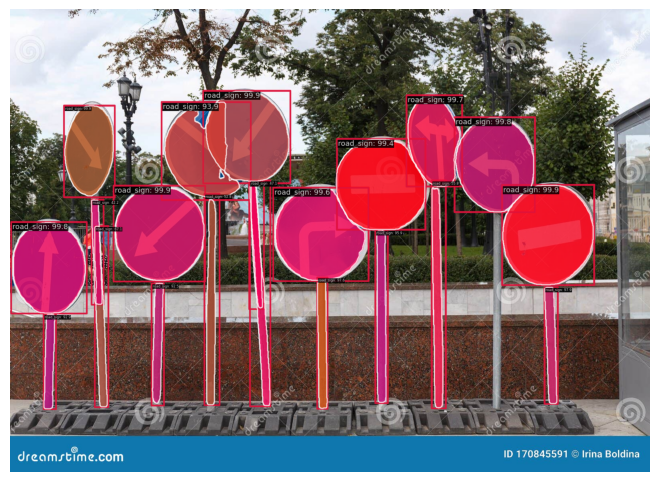

In [ ]:
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

In [ ]:
!gdown 'https://th.bing.com/th/id/OIP.Oj1M4FhCfzDaqJ9ZuYFLmQHaFx?rs=1&pid=ImgDetMain'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://th.bing.com/th/id/OIP.Oj1M4FhCfzDaqJ9ZuYFLmQHaFx?rs=1&pid=ImgDetMain
To: /content/mmdetection/OIP.Oj1M4FhCfzDaqJ9ZuYFLmQHaFx?rs=1&pid=ImgDetMain
100% 41.2k/41.2k [00:00<00:00, 110MB/s]


In [ ]:
image = mmcv.imread('/content/moscow-russia-may-road-signs-exit-zelenograd-moscow-russia-may-road-signs-exit-zelenograd-132064958.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    ori_shape: (1247, 1600)
    pad_shape: (800, 1056)
    batch_input_shape: (800, 1056)
    scale_factor: (0.64125, 0.6415396952686447)
    img_path: None
    img_shape: (800, 1026)
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=1247, width=1600)
        ) at 0x7fe97a7d3fd0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 922.2281,  224.7593, 1024.1814,  323.1548],
                        [ 719.1082,  728.5103,  762.8779,  777.7594],
                        [ 900.1591,  790.4484,  937.1370,  830.6631],
                        [ 723.1080,  785.1120,  756.7661,  877.4385],
                      

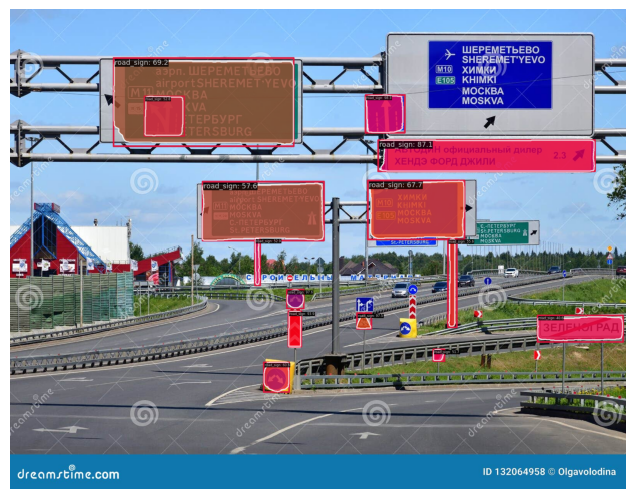

In [ ]:
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

In [ ]:
image = mmcv.imread('/content/lomonosoa.jpeg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    ori_shape: (750, 474)
    pad_shape: (1280, 800)
    batch_input_shape: (1280, 800)
    scale_factor: (1.6877637130801688, 1.688)
    img_path: None
    img_shape: (1266, 800)
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=750, width=474)
        ) at 0x7fe97918e020>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[290.0010, 268.9085, 351.0876, 328.5491],
                        [  9.6551, 289.3160,  48.8548, 329.3181],
                        [227.4244, 201.7807, 303.4863, 277.5841],
                        [365.1616, 405.9265, 391.9729, 432.3190],
                        [443.3986, 369.2142,

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


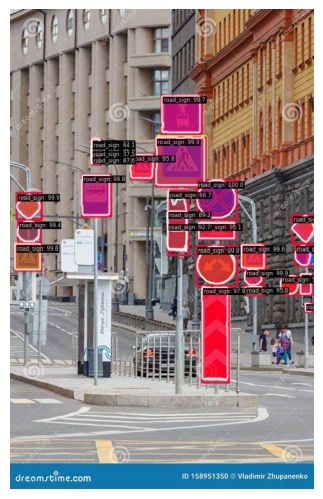

In [ ]:
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()